In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
#spinup year
start = '2015-05-01'
end = '2015-12-31'

st = dt.datetime(2015,5,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)


#PI year
start3 = '2015-05-01'
end3 = '2015-12-31'

st3 = dt.datetime(2015,5,1)
en3 = dt.datetime(2015,12,31)
y_st3 = st3.timetuple().tm_yday
print(y_st3)
y_en3 = en3.timetuple().tm_yday
print(y_en3)
ts_PI = np.arange(y_st3,y_en3+1,1)


bdir = '/data/tjarniko/results/BR_1st_2015/ncs/'
sdir = '/data/tjarniko/results/BR_1st_2015/ncs/'
#sdir2 = '/data/tjarniko/results/BR_2nd_2015/ncs/'
sdir3 = '/data/tjarniko/results/PREIND_1st_2015/ncs/'

thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

figstring = 'BR2015'

121
365
121
365


In [7]:
def make_nclen(start,end,ftype, bdir, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)
    
    #print('days: '+str(len(arrow_array)))
    dayslen = len(arrow_array)
    hovmoller_base = np.zeros([1533,40,dayslen])
    hovmoller_sens = np.zeros([1533,40,dayslen])

    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        #nc_base = bdir  + ddmmmyy + '/SalishSea_1d_*_' + ftype +'_T.nc'
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'_T_' + ymd + '-' + ymd + '.nc'
        #tnc_base = glob.glob(nc_base) 
        tnc_sens = glob.glob(nc_sens)
#         print(tnc_sens)
        
        #base_ar.append(tnc_base[0])
        sens_ar.append(tnc_sens[0])
        
    return base_ar, sens_ar

In [8]:
base_ar, sens_ar = make_nclen(start,end,'carp', bdir, sdir)
base_ar3, sens_ar3 = make_nclen(start3,end3,'carp', bdir, sdir3)
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

In [9]:
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
t_surfa = udir*vdir



In [10]:
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
t_surfa = udir*vdir

def combine_files_surfa(files, surfa):
    stor_mol = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['dissolved_inorganic_carbon'][0,0,:,:]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = var_tmp * surfa
        totdic = np.sum(np.sum(var_tmp2))
        totdic_mols = totdic * (1/1000)
#         print(totflux)
        
        stor_mol[i] = totdic_mols
        i = i+1

#     var_ary = np.concatenate(var_list, axis=0)
    return stor_mol

In [11]:
max

<function max>

In [12]:
flux_sens = combine_files_surfa(sens_ar,t_surfa)
print(np.shape(flux_sens))
flux_sens3 = combine_files_surfa(sens_ar3,t_surfa)
print(np.shape(flux_sens3))

0


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


50
100
150
200
(245,)
0
50
100
150
200
(245,)


In [13]:
len(ts_PI)

245

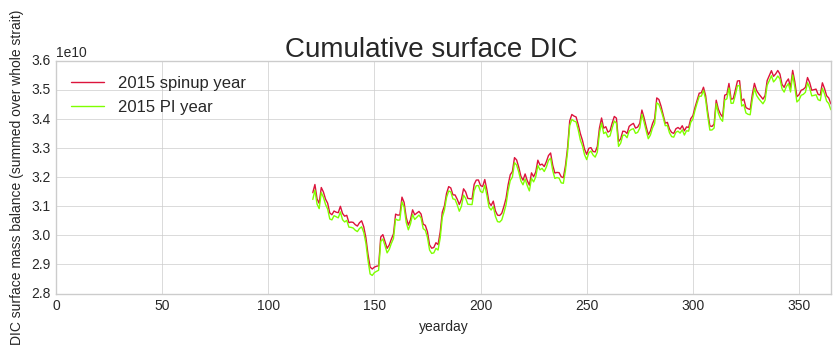

In [14]:
figstring = 'this'
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR,flux_sens,color = 'crimson',label = '2015 spinup year')
ax.plot(ts_PI,flux_sens3,color = 'chartreuse', label = '2015 PI year')
ax.legend(loc = 'best')
plt.ylabel('DIC surface mass balance (summed over whole strait)')
plt.xlabel('yearday')
plt.xlim([0,365])
# ax.set_ylabel('no')

# ax.set_xlim([0,265])
 

fig.suptitle('Cumulative surface DIC', fontsize = 20)
plt.show()

t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


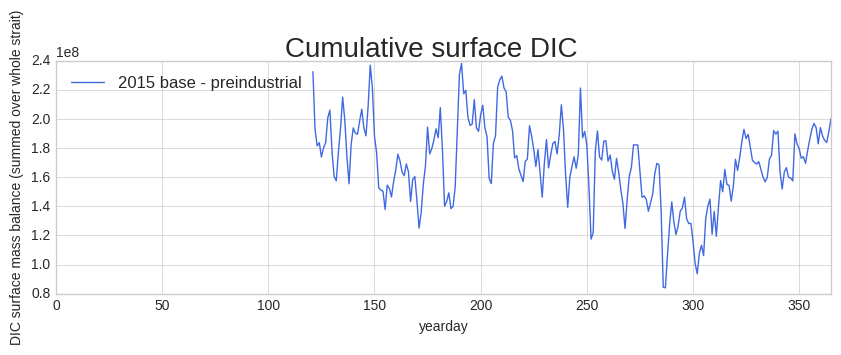

In [15]:
figstring = 'this'
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_PI,flux_sens-flux_sens3,color = 'royalblue', label = '2015 base - preindustrial')
ax.legend(loc = 'best')
plt.ylabel('DIC surface mass balance (summed over whole strait)')
plt.xlabel('yearday')
plt.xlim([0,365])

 

fig.suptitle('Cumulative surface DIC', fontsize = 20)

plt.show()

t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'

